In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import scale

from ulca.ulca import ULCA
from ulca_ui.plot import Plot

In [2]:
# data loading and preparation

# load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# df = pd.read_csv('./data/mnist_784.csv')
# X = np.array(df)[:, :-1].astype(float)
# y = np.array(df)[:, -1]

In [3]:
X /= np.max(X)
y = y.astype(int)

In [4]:
n_samples_each = 500
target_idx = np.hstack((np.where(y == 0)[0][:n_samples_each], 
                        np.where(y == 6)[0][:n_samples_each], 
                        np.where(y == 9)[0][:n_samples_each]))
X_069 = X[target_idx,:]
y_069 = y[target_idx]

In [5]:
ulca = ULCA(n_components=2)

In [6]:
# this shows the characters that 6 and 9 have but 0 does not
w_tg = {0: 0, 6: 1, 9: 1}
w_bg = {0: 1, 6: 0, 9: 0}
w_bw = {0: 0, 6: 0, 9: 0}
alpha = 5

ulca = ulca.fit(X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha)

Plot().plot_emb(dr=ulca, X=X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha,
                w_area={'move': 0.2, 'scale': 0.8},
                w_dist={'move': 0.8, 'scale': 0.2}, weight_opt_max_iter=30)

Screenshot of the visualized result in UI
![title](plot_image/mnist1.png)

In [7]:
# this shows the characters that 6 and 9 have but 0 does not
# intearctively reduce 9's target weight

# these are the parameters after the interaction
w_tg = {0: 0, 6: 1, 9: 0.5}
w_bg = {0: 1, 6: 0, 9: 0}
w_bw = {0: 0, 6: 0, 9: 0}
alpha = 5

ulca = ulca.fit(X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha)

Plot().plot_emb(dr=ulca, X=X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha,
                w_area={'move': 0.2, 'scale': 0.8},
                w_dist={'move': 0.8, 'scale': 0.2}, weight_opt_max_iter=30)

Screenshot of the visualized result in UI
![title](plot_image/mnist2.png)

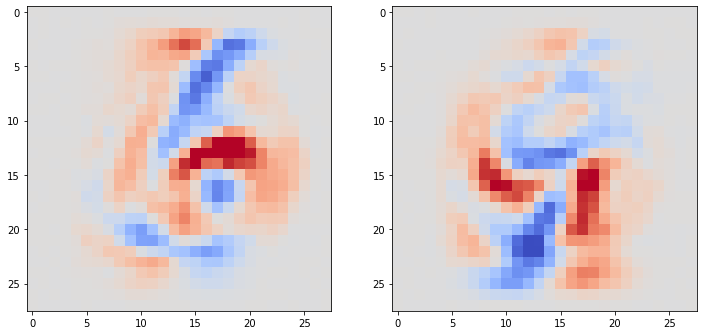

In [8]:
pc1 = ulca.M[:, 0]
pc2 = ulca.M[:, 1]

abs_max = max(abs(pc1)) * 0.6
fig, axes = plt.subplots(1, 2, figsize=(12, 24))
axes[0].imshow(pc1.reshape((int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))),
           cmap='coolwarm',
           vmin=-abs_max,
           vmax=abs_max)
axes[1].imshow(pc2.reshape((int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))),
           cmap='coolwarm',
           vmin=-abs_max,
           vmax=abs_max)
plt.show()

In [9]:
# add separation between (digit 0) to (digits 6, 9)
# intearactively adjust parameters

# these are the parameters after the interaction
w_tg = {0: 0, 6: 1, 9: 0.5}
w_bg = {0: 1, 6: 0, 9: 0}
w_bw = {0: 1, 6: 0, 9: 0}
alpha = 10

ulca = ulca.fit(X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha)

Plot().plot_emb(dr=ulca, X=X_069, y=y_069, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha,
                w_area={'move': 0.2, 'scale': 0.8},
                w_dist={'move': 0.8, 'scale': 0.2}, weight_opt_max_iter=30)

Screenshot of the visualized result in UI
![title](plot_image/mnist3.png)

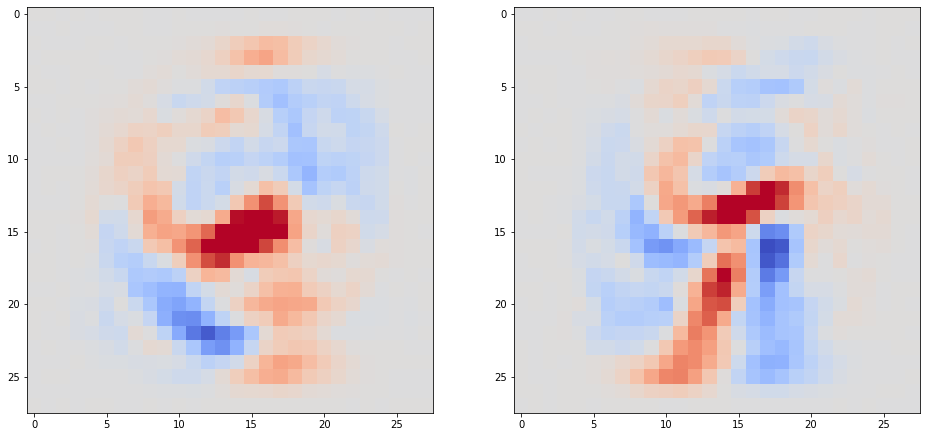

In [10]:
# this shows the characters that 6 and 9 have but 0 does not
pc1 = ulca.M[:, 0]
pc2 = ulca.M[:, 1]

abs_max = max(abs(pc1)) * 0.6
fig, axes = plt.subplots(1, 2, figsize=(16, 32))
axes[0].imshow(pc1.reshape((int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))),
           cmap='coolwarm',
           vmin=-abs_max,
           vmax=abs_max)
axes[1].imshow(pc2.reshape((int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))),
           cmap='coolwarm',
           vmin=-abs_max,
           vmax=abs_max)
plt.show()

In [11]:
# if PC2 shows the difference in top-right to bottom-left strokes, digit 7 should have a similar result with 9
n_samples_each = 500
target_idx = np.hstack((np.where(y == 0)[0][:n_samples_each], 
                        np.where(y == 6)[0][:n_samples_each], 
                        np.where(y == 9)[0][:n_samples_each],
                        np.where(y == 7)[0][:n_samples_each]))
X_0697 = X[target_idx,:]
y_0697 = y[target_idx]

In [12]:
Plot().plot_emb(dr=ulca, X=X_0697, y=y_0697, w_tg=w_tg, w_bg=w_bg, w_bw=w_bw, alpha=alpha,
                w_area={'move': 0.2, 'scale': 0.8},
                w_dist={'move': 0.8, 'scale': 0.2}, weight_opt_max_iter=30)

Screenshot of the visualized result in UI
![title](plot_image/mnist4.png)